In [16]:
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
import pandas as pd
import ecg_plot

def extraer_datos(data):
    # Abrir el archivo de texto
    with open(data, "r") as f:
        # Saltar las tres primeras líneas
        next(f)
        next(f)
        next(f)
        
        # Leer todas las líneas restantes
        all_data = f.readlines()   
    
    # Procesar cada línea, dividiendo por tabulaciones
    all_data = [line.strip().split('\t') for line in all_data]
    
    # Extraer la primera columna (muestra)
    sample = [int(row[0]) for row in all_data]  # Primera columna

    # Crear una secuencia de números para la muestra (opcional, según tu lógica)
    sample = np.arange(0, len(sample))  # Reemplaza los valores por una secuencia 0, 1, 2, ..., n
    
    # Extraer la sexta columna (amplitud)
    amplitude = [int(row[5]) for row in all_data]  # Sexta columna (índice 5)
    amplitude = np.array(amplitude)
    return sample, amplitude  # Devolver los valores de la muestra y amplitud


def grafica(sample, amplitude):
    plt.figure(figsize=(12, 5))

    plt.plot(sample/1000, amplitude)
    plt.title('Señal de ECG preprocesada: Aguantar respiración')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)
   
    plt.tight_layout()
    plt.show()

In [9]:
def ecg_procesamiento(sample, raw_signal, i=1):
    cleaned_signal = nk.ecg_clean(raw_signal, sampling_rate=1000)
    #Segundo escalamiento
    cleaned_signal = cleaned_signal*1.5/np.max(cleaned_signal)
    #Ploteo de señal filtrada
    grafica(sample[0:5500], cleaned_signal[0:5500])
    
    signals, info = nk.ecg_process(cleaned_signal, sampling_rate=1000)
    nk.ecg_plot(signals, info)

    # Realizar el análisis de la señal limpia
    results = nk.ecg_analyze(signals, sampling_rate=1000)
    x = results.iloc[0, 0]
    print("Para la derivada", i, "del estado basal, el ritmo cardiaco promedio es de:", round(x), "bpm")
    ecg_plot.plot_1(cleaned_signal[0:5000])

    i += 1

    return i    

### Derivada 1

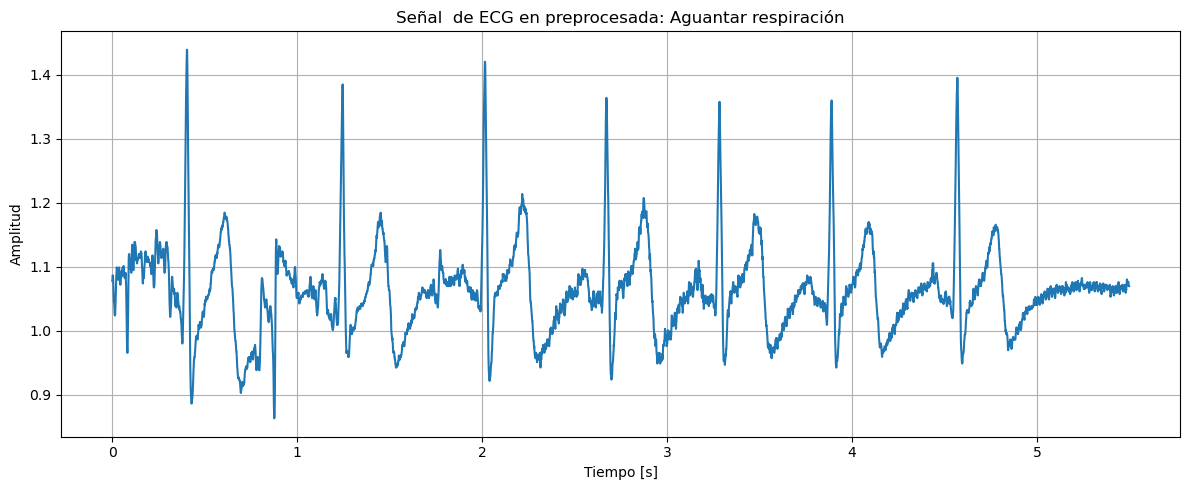

In [10]:
sample, amplitude = extraer_datos("derivada1.txt")
amplitude = amplitude*1.5/np.max(amplitude)
grafica(sample[0:5500], amplitude[0:5500])

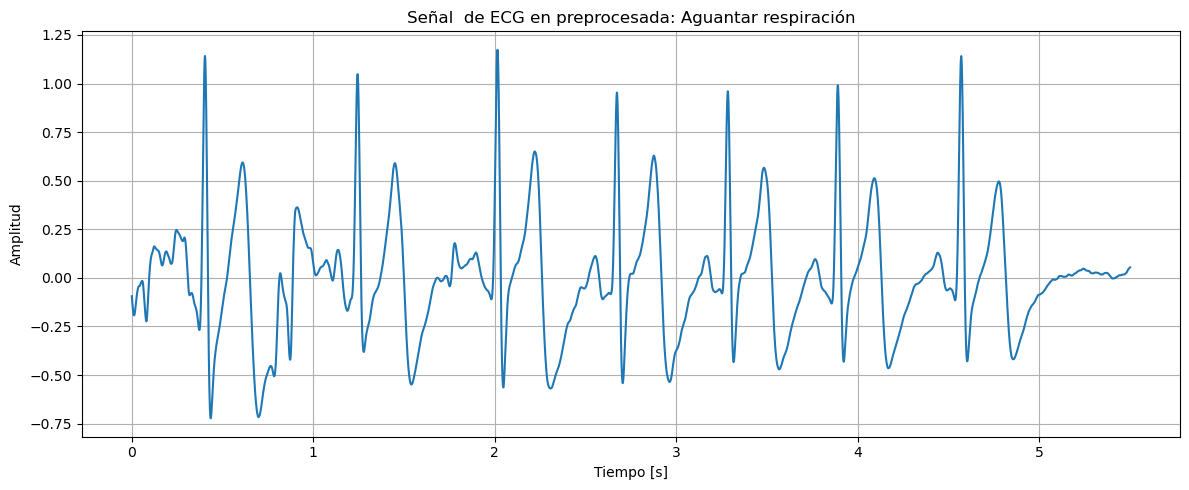

c:\Users\aleja\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Para la derivada 1 del estado basal, el ritmo cardiaco promedio es de: 74 bpm


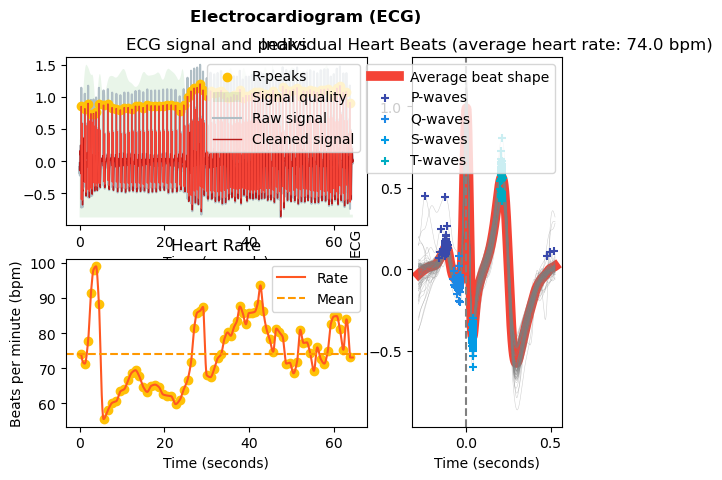

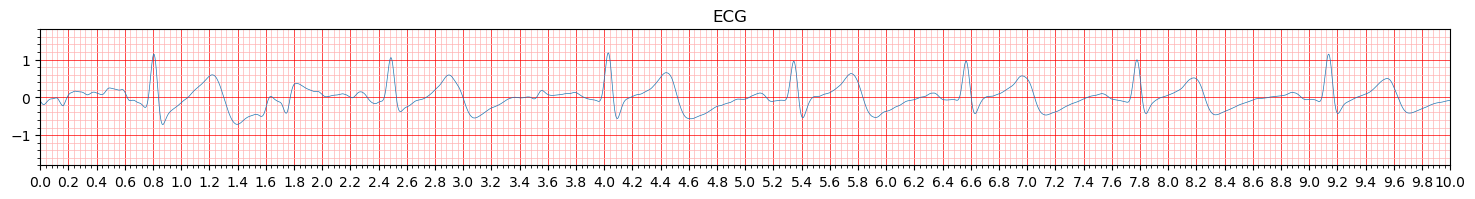

In [11]:
#Etapa de preprocesamiento via ecg_clean()
i = ecg_procesamiento(sample, amplitude)

## Derivada 2

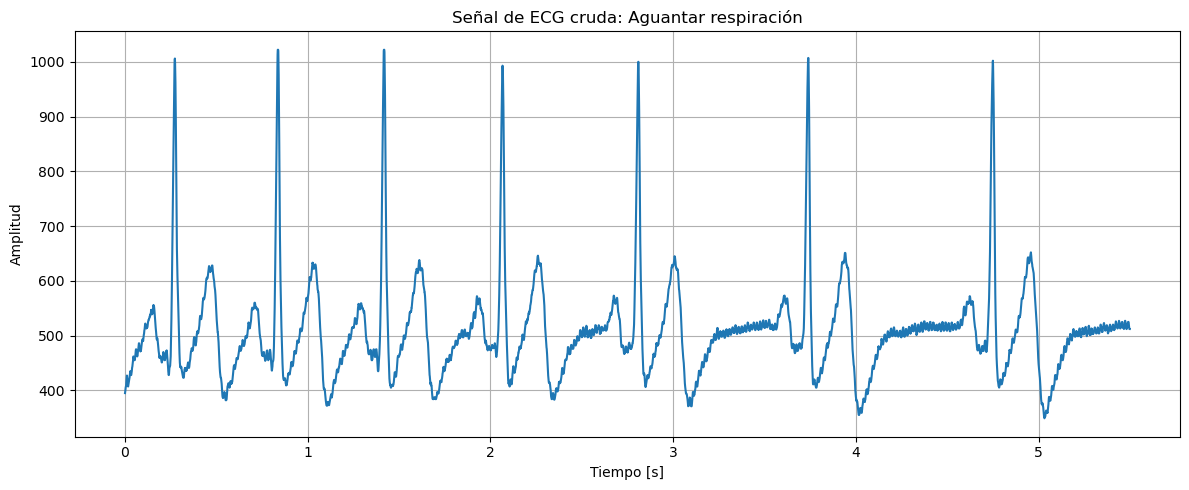

In [15]:
sample, amplitude = extraer_datos("derivada2.txt")
grafica(sample[0:5500], amplitude[0:5500])

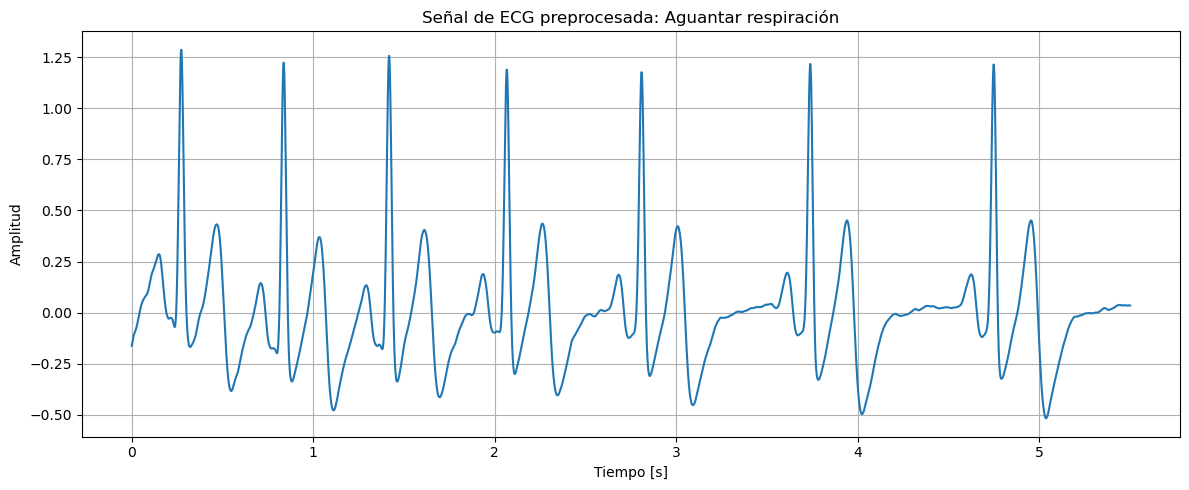

c:\Users\aleja\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Para la derivada 2 del estado basal, el ritmo cardiaco promedio es de: 73 bpm


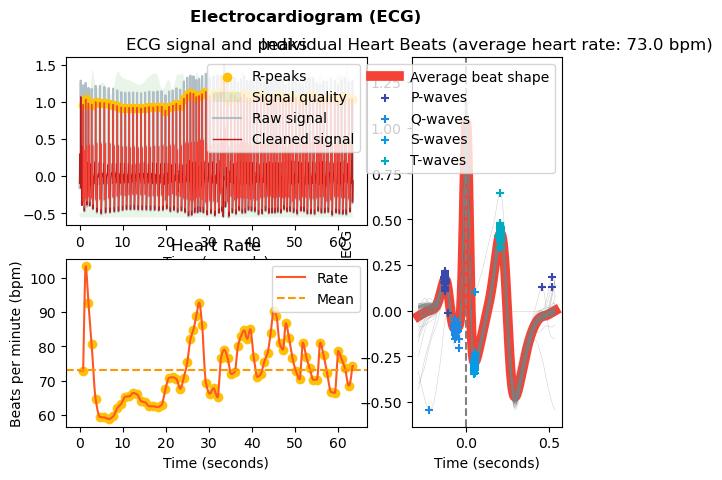

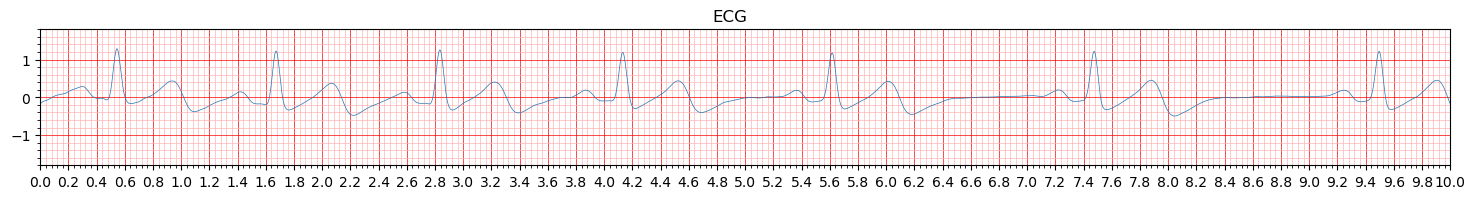

In [17]:
i = ecg_procesamiento(sample, amplitude, i)

c:\Users\aleja\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


Para el estado basal, el ritmo cardiaco promedio es de: 73 bpm


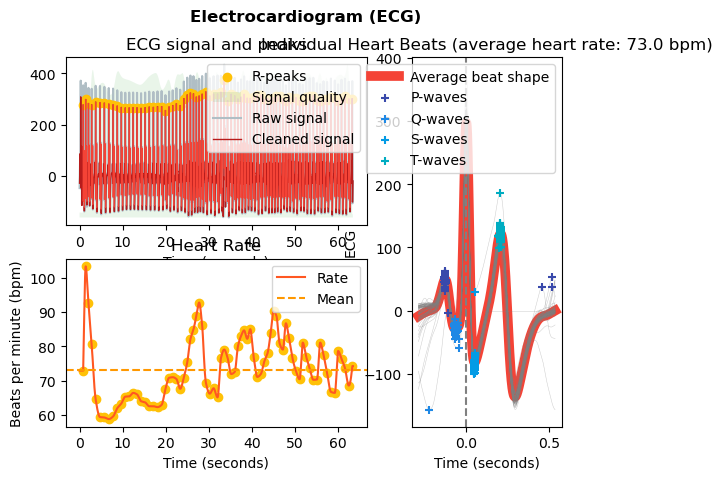

In [36]:
#Procesamiento de la señal via ecg.process()
signals, info = nk.ecg_process(cleaned_signal, sampling_rate=1000)
nk.ecg_plot(signals, info)

# Realizar el análisis completo de la señal limpia
results = nk.ecg_analyze(signals, sampling_rate=1000)
x = results.iloc[0, 0]
print("Para el estado basal, el ritmo cardiaco promedio es de:", round(x), "bpm")